In [ ]:
# # Uncomment to install the required libraries
# ! pip install numpy
# ! pip install matplotlib
# ! pip install mpmath

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp
mp.eps = 10
mp.pretty = False

### Defined Functions

In [2]:
def qD_infinite_conductivity(s):

    # Solution parameters
    a1 = s*Reta + 0.5*Rk*mp.sqrt(s) \
        * (mp.tanh(mp.sqrt(s)*(xD1-1))+mp.tanh(mp.sqrt(s)*(xD2-1)))
    a2 = mp.sinh(mp.sqrt(a1)*yDs)/s
    a3 = mp.cosh(mp.sqrt(a1)*yDs)/s
    a4 = mp.coth(mp.sqrt(a1)*yDs)

    # Pressure drop per unit flux at boundary
    sum_n = 0
    for n in mp.arange(1, 101, 1):
        xi = mp.sqrt(s+(n*mp.pi/xDe)**2)
        sum_n += 4*(mp.sin(n*mp.pi/xDe)**2)*(mp.cos(n*mp.pi*xD1/xDe)**2) \
            * mp.coth(xi*yD1)/(n**2*xi)

    PHID1s_avg = 2*mp.coth(mp.sqrt(s)*yD1)/(xDe*s*mp.sqrt(s)) \
        + xDe/(mp.pi**2*s)*sum_n

    # Pressure drop at boundary
    pD1s_avg = (a3*a4-a2)/(Rk/(s*mp.sqrt(a1)*PHID1s_avg)+a4)

    # Rate
    qDw = 2*mp.sqrt(a1)*(a3-pD1s_avg)/(Rk*s*a2)

    return qDw

In [3]:
def qD_finite_conductivity(s):

    # Solution parameters
    a1 = s*Reta + 0.5*Rk*mp.sqrt(s) \
        * (mp.tanh(mp.sqrt(s)*(xD1-1))+mp.tanh(mp.sqrt(s)*(xD2-1)))
    a2 = mp.sinh(mp.sqrt(a1)*yDs)/s
    a3 = mp.cosh(mp.sqrt(a1)*yDs)/s
    a4 = mp.coth(mp.sqrt(a1)*yDs)

    a5 = s*Retaf + 2*mp.sqrt(a1)*a4/FCDs
    a6 = 2*mp.sqrt(a1)/(FCDs*s*a2)
    a7 = mp.tanh(mp.sqrt(a5))/(s*mp.sqrt(a5))

    # Pressure drop per unit flux at boundary
    sum_n = 0
    for n in mp.arange(1, 101, 1):
        xi = mp.sqrt(s+(n*mp.pi/xDe)**2)
        sum_n += 4*(mp.sin(n*mp.pi/xDe)**2)*(mp.cos(n*mp.pi*xD1/xDe)**2) \
            * mp.coth(xi*yD1)/(n**2*xi)

    PHID1s_avg = 2*mp.coth(mp.sqrt(s)*yD1)/(xDe*s*mp.sqrt(s)) \
        + xDe/(mp.pi**2*s)*sum_n

    # Pressure drop at boundary
    pD1s_avg = s*(a3*a4-a2)*a7/(Rk/(s*mp.sqrt(a1)*PHID1s_avg)
                                + a4+s*(a2-a3*a4)*a6/a5*(1-s*a7))

    # Rate
    qDw = 1/(1/(FCD*(a5-s*a6*pD1s_avg)*a7)+s*SC/(2*mp.pi))

    return qDw

In [4]:
def qD_infinite_conductivity_homogeneous(s):

    # Pressure drop per unit flux at boundary
    sum_n = 0
    for n in mp.arange(1, 101, 1):
        xi = mp.sqrt(s+(n*mp.pi/xDe)**2)
        sum_n += 4*(mp.sin(n*mp.pi/xDe)**2)*(mp.cos(n*mp.pi*xD1/xDe)**2) \
            * mp.coth(xi*yD1)/(n**2*xi)

    PHID1f_avg = 2*mp.coth(mp.sqrt(s)*yDe)/(xDe*s*mp.sqrt(s)) \
        + xDe/(mp.pi**2*s)*sum_n

    # Rate
    qDw = 2/(s**2*PHID1f_avg)

    return qDw

In [5]:
def qD_infinite_conductivity_dualporosity(s):

    # Warren and Root's F(s)
    F = (lamb + s*omeg*Reta*(1-omeg))/(lamb + s*Reta*(1-omeg))

    # Solution parameters
    a1 = s*Reta*F + 0.5*Rk*mp.sqrt(s) \
        * (mp.tanh(mp.sqrt(s)*(xD1-1))+mp.tanh(mp.sqrt(s)*(xD2-1)))
    a2 = mp.sinh(mp.sqrt(a1)*yDs)/s
    a3 = mp.cosh(mp.sqrt(a1)*yDs)/s
    a4 = mp.coth(mp.sqrt(a1)*yDs)

    # Pressure drop per unit flux at boundary
    sum_n = 0
    for n in mp.arange(1, 101, 1):
        xi = mp.sqrt(s+(n*mp.pi/xDe)**2)
        sum_n += 4*(mp.sin(n*mp.pi/xDe)**2)*(mp.cos(n*mp.pi*xD1/xDe)**2) \
            * mp.coth(xi*yD1)/(n**2*xi)

    PHID1s_avg = 2*mp.coth(mp.sqrt(s)*yD1)/(xDe*s*mp.sqrt(s)) \
        + xDe/(mp.pi**2*s)*sum_n

    # Pressure drop at boundary
    pD1s_avg = (a3*a4-a2)/(Rk/(s*mp.sqrt(a1)*PHID1s_avg)+a4)

    # Rate
    qDw = 2*mp.sqrt(a1)*(a3-pD1s_avg)/(Rk*s*a2)

    return qDw

In [6]:
def invertlaplace(qD_function, tDmin, tDmax, npoints=100, method='stehfest'):
        
    tD = np.logspace(np.log10(tDmin), np.log10(tDmax), npoints)
    qD = np.zeros(npoints)
    for i, ttD in enumerate(tD):
        qD[i] = mp.invertlaplace(qD_function, ttD, method=method)
        
    return tD, qD

In [7]:
def scale(tD, qD):
    # Scale variables for plotting
    t = tD*t_scale
    q = qD*q_scale

    # Normalized pressure
    pnorm = (pi-pw)/q

    # Semilog derivative
    dpnorm = np.gradient(pnorm, np.log(t), axis=0, edge_order=2)

    return t, pnorm, dpnorm

In [8]:
def plotresult(title, x, y, 
               label=['Normalized Pressure', 'Derivative'],
               xlim=[1e0, 1e4], ylim=[1e1, 1e5], 
               xlabel='Time (days)', ylabel='Normalized Pressure (psia.d/STB)',
               figsize=(9,6.2), dpi=100, background=None, alpha=0.25, 
               legend=None, grid='major', savename=None):

    fig = plt.figure(figsize=figsize, dpi=dpi)
    
    # Make ax1 transparent so we can see image behind
    ax1 = fig.add_subplot(1, 1, 1, facecolor='None')
    ax1.set_title(title, fontsize=14)
    for i in range(np.shape(x)[1]):
        ax1.loglog(x[:,i], y[:,i], linewidth=2, label=label[i])
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    ax1.set_xlabel(xlabel, fontsize=14)
    ax1.set_ylabel(ylabel, fontsize=14)
    if legend != None: 
        ax1.legend(fontsize=12, loc=legend)
    if grid != None:
        ax1.grid(which=grid)
    
    if background != None: 
        img = plt.imread('Plots/'+background)
        # Create second axes
        ax2 = ax1.twinx().twiny()
        # Or alternatively
        # ax2 = fig.add_subplot(111, label="ax2")
        # Add image to twin axes
        ax2.imshow(img, alpha=alpha)
        # Fix zorder so ax1 on top of ax2
        ax1.set_zorder(10)
        ax2.set_zorder(1)
        # Turn off ticks from twin axes
        ax2.set_xticks([])
        ax2.set_yticks([])
           
    plt.show()
    
    if savename != None:
        plt.savefig(savename, dpi=500, quality=95)

### Comparing with Numerical Solutions

#### Example 1 - Infinite, Composite
* Infinite conductivity fracture. 
* Composite (region S exists). 

In [9]:
# Base case parameters
pi = 4000
pw = 1500
mu = 1
ct = 0.5e-5
B = 1.2
h = 100
rw = 0.3
xf = 125
xe = 1050
ye = 100
w = 0.0013
phi = 0.07
phis = 0.12
phif = 0.4
k = 0.0005
ks = 0.001

In [10]:
# Case-specific parameters
x1 = 375
ys = 18

In [11]:
xDe = xe/xf
xD1 = x1/xf
xD2 = xDe - xD1

yDe = ye/xf
yDs = ys/xf
yD1 = yDe - yDs

Rk = k/ks
Reta = (k/phi)/(ks/phis)

In [12]:
# Constants to convert tD and qD to t and q
t_scale = mu*ct*phi*xf**2/(k*2.637e-4*24)  # day
q_scale = 1.127e-3*2*k*h*(pi-pw)/(mu*B)  # stb/d

In [13]:
tD1, qD1 = invertlaplace(qD_infinite_conductivity, tDmin=1e0/t_scale, tDmax=8e3/t_scale)
t1, pnorm1, dpnorm1 = scale(tD1, qD1)

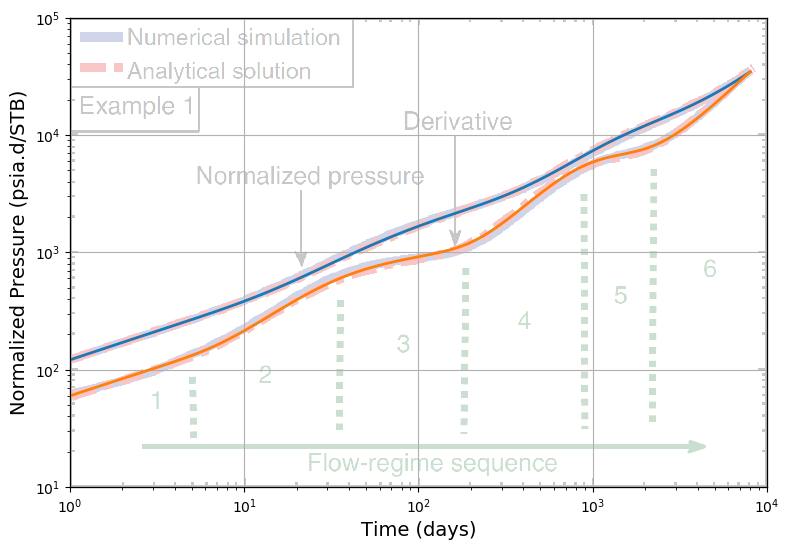

In [14]:
plotresult('',
           x=np.array([t1, t1]).T, y=np.column_stack((pnorm1, dpnorm1)), 
           figsize=(9,6.22), background='sim1.png', grid='major', savename=None)

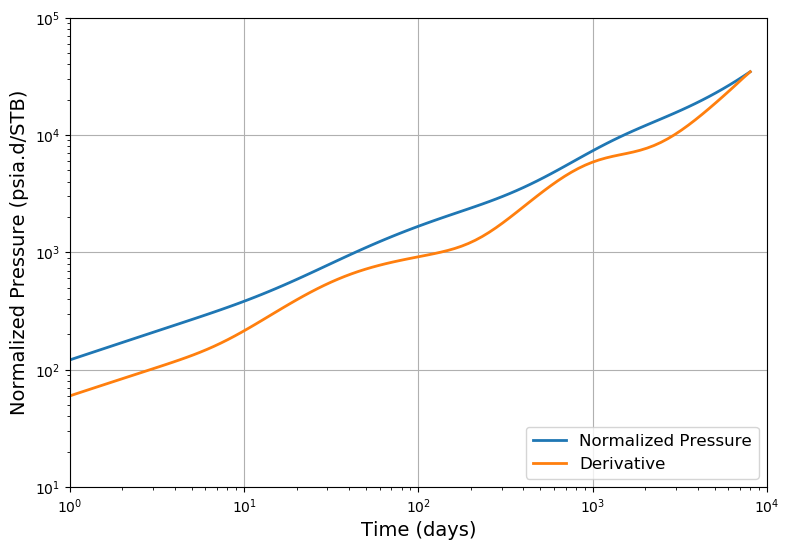

In [15]:
plotresult('',
           x=np.array([t1, t1]).T, y=np.column_stack((pnorm1, dpnorm1)), 
           figsize=(9,6.22), background=None, grid='major', legend='lower right')

#### Example 2 - Finite, Composite
* Finite conductivity fracture. 
* Composite (region S exists). 

In [16]:
# Base case parameters
pi = 4000
pw = 1500
mu = 1
ct = 0.5e-5
B = 1.2
h = 100
rw = 0.3
xf = 125
xe = 1050
ye = 100
w = 0.0013
phi = 0.07
phis = 0.12
phif = 0.4
k = 0.0005
ks = 0.001

In [17]:
# Case-specific parameters
x1 = 375
ys = 18

In [18]:
xDe = xe/xf
xD1 = x1/xf
xD2 = xDe - xD1

yDe = ye/xf
yDs = ys/xf
yD1 = yDe - yDs

Rk = k/ks
Reta = (k/phi)/(ks/phis)

In [19]:
kf = 2000

Retaf = (k/phi)/(kf/phif)
FCDs = w*kf/(xf*ks)
FCD = w*kf/(xf*k)
SC = ks*h*(mp.log(h/(2*rw))-mp.pi/2)/(kf*w)

In [20]:
# Constants to convert tD and qD to t and q
t_scale = mu*ct*phi*xf**2/(k*2.637e-4*24)  # day
q_scale = 1.127e-3*2*k*h*(pi-pw)/(mu*B)  # stb/d

In [21]:
tD2, qD2 = invertlaplace(qD_finite_conductivity, tDmin=1e0/t_scale, tDmax=8e3/t_scale)
t2, pnorm2, dpnorm2 = scale(tD2, qD2)

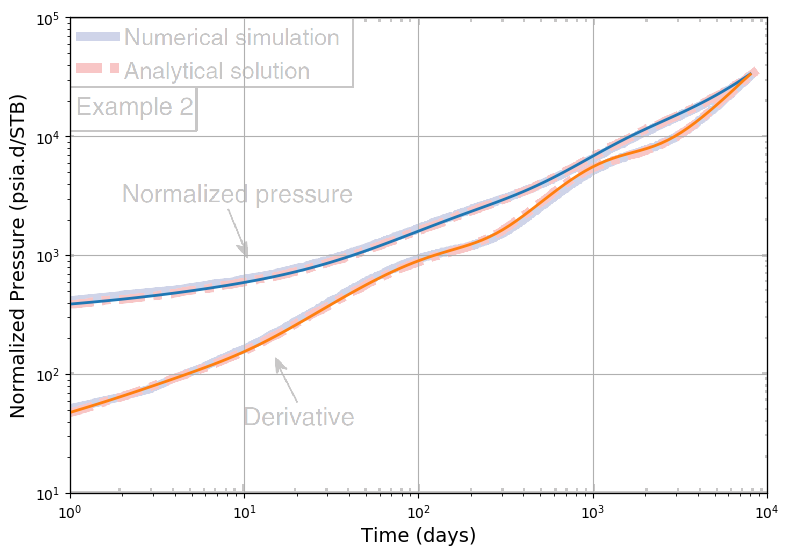

In [22]:
plotresult('',
           x=np.array([t2, t2]).T, y=np.column_stack((pnorm2, dpnorm2)), 
           figsize=(9,6.3), background='sim2.png', grid='major', savename=None)

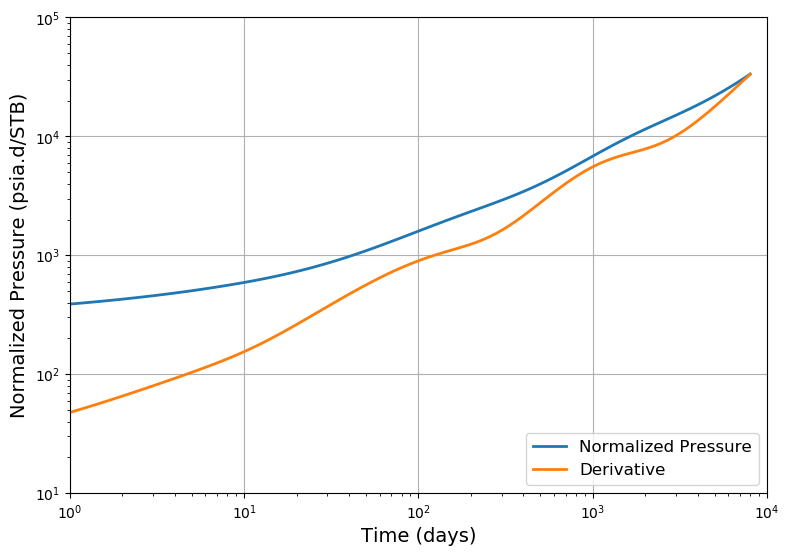

In [23]:
plotresult('',
           x=np.array([t2, t2]).T, y=np.column_stack((pnorm2, dpnorm2)), 
           figsize=(9,6.3), background=None, grid='major', legend='lower right')

#### Example 3 - Infinite, Homogeneous
* Infinite conductivity fracture. 
* Homogeneous (no region S). 

In [24]:
# Base case parameters
pi = 4000
pw = 1500
mu = 1
ct = 0.5e-5
B = 1.2
h = 100
rw = 0.3
xf = 125
xe = 1050
ye = 100
w = 0.0013
phi = 0.07
phis = 0.12
phif = 0.4
k = 0.0005
ks = 0.001

In [25]:
# Case-specific parameters
x1 = 375
ys = 0

In [26]:
xDe = xe/xf
xD1 = x1/xf
xD2 = xDe - xD1

yDe = ye/xf
yDs = ys/xf
yD1 = yDe - yDs

Rk = k/ks
Reta = (k/phi)/(ks/phis)

In [27]:
# Constants to convert tD and qD to t and q
t_scale = mu*ct*phi*xf**2/(k*2.637e-4*24)  # day
q_scale = 1.127e-3*2*k*h*(pi-pw)/(mu*B)  # stb/d

In [28]:
tD3, qD3 = invertlaplace(qD_function=qD_infinite_conductivity_homogeneous, 
                         tDmin=1e0/t_scale, tDmax=8e3/t_scale, npoints=100)
t3, pnorm3, dpnorm3 = scale(tD3, qD3)

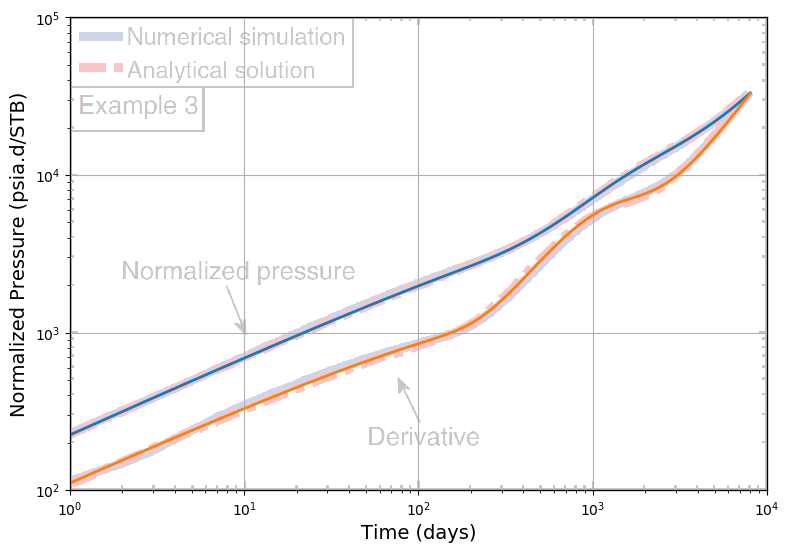

In [29]:
plotresult('',
           x=np.array([t3, t3]).T, y=np.column_stack((pnorm3, dpnorm3)), 
           xlim=(1e0,1e4), ylim=(1e2,1e5), 
           figsize=(9,6.26), background='sim3.png', grid='major', savename=None)

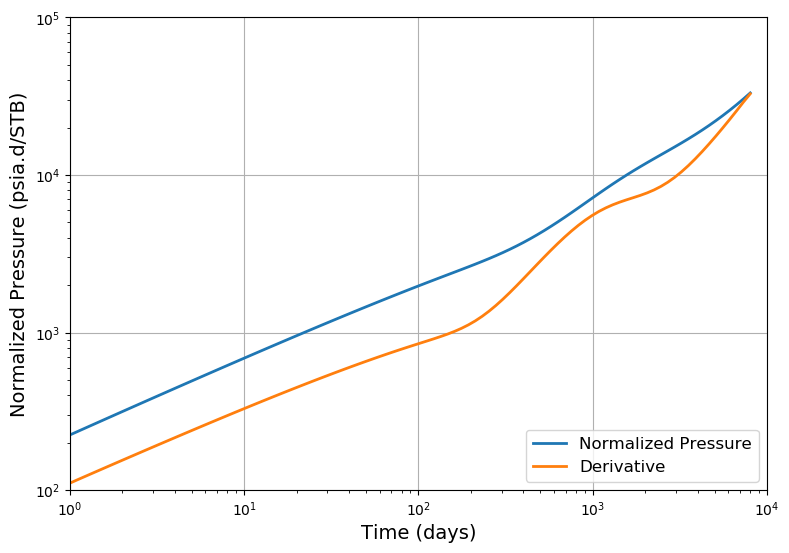

In [30]:
plotresult('',
           x=np.array([t3, t3]).T, y=np.column_stack((pnorm3, dpnorm3)), 
           xlim=(1e0,1e4), ylim=(1e2,1e5), 
           figsize=(9,6.26), background=None, grid='major', legend='lower right')

#### Example 4 - Infinite, Dual-porosity
* Region S exhibits dual-porosity behaviour. 

In [31]:
# Base case parameters
pi = 4000
pw = 1500
mu = 1
ct = 0.5e-5
B = 1.2
h = 100
rw = 0.3
xf = 125
xe = 1050
ye = 100
w = 0.0013
phi = 0.07
phis = 0.12
phif = 0.4
k = 0.0005
ks = 0.001

In [32]:
x1 = 375
ys = 18

In [33]:
xDe = xe/xf
xD1 = x1/xf
xD2 = xDe - xD1

yDe = ye/xf
yDs = ys/xf
yD1 = yDe - yDs

Rk = k/ks
Reta = (k/phi)/(ks/phis)

In [34]:
# Case-specific parameters
kfb = 1e-3
phif = 1e-2
km = 2e-4
phim = 7e-2
sigma = 0.1

In [35]:
Rk = km/kfb
Reta = (km/phim)/(kfb/(phim+phif))
lamb = sigma*xf**2*km/kfb
omeg = phif/(phim+phif)

In [36]:
# Constants to convert tD and qD to t and q
t_scale = mu*ct*phim*xf**2/(km*2.637e-4*24)  # day
q_scale = 1.127e-3*2*km*h*(pi-pw)/(mu*B)  # stb/d

In [37]:
tD4, qD4 = invertlaplace(qD_function=qD_infinite_conductivity_dualporosity,
                         tDmin=1e-3/t_scale, tDmax=1e4/t_scale)
t4, pnorm4, dpnorm4 = scale(tD4, qD4)

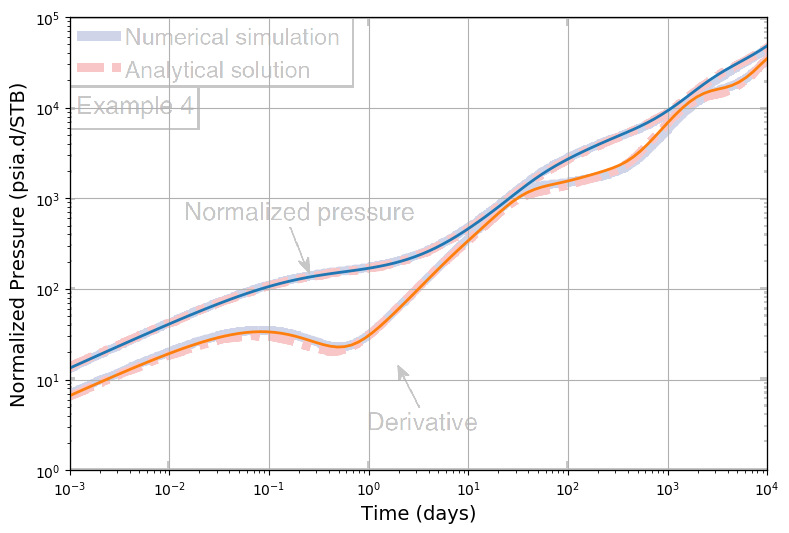

In [38]:
plotresult('',
           x=np.array([t4, t4]).T, y=np.column_stack((pnorm4, dpnorm4)), 
           xlim=(1e-3,1e4), ylim=(1e0, 1e5),
           figsize=(9,6), background='sim4.png', grid='major', savename=None)

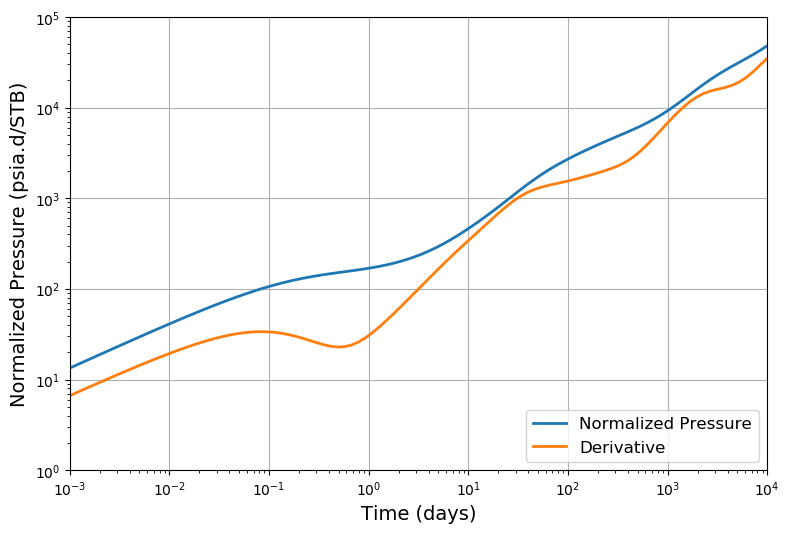

In [39]:
plotresult('',
           x=np.array([t4, t4]).T, y=np.column_stack((pnorm4, dpnorm4)), 
           xlim=(1e-3,1e4), ylim=(1e0, 1e5),
           figsize=(9,6), background=None, grid='major', legend='lower right')

### Comparing with Previous EFR Model (Stalgorova and Mattar, 2013)

In [40]:
# Base case parameters
pi = 4000
pw = 1500
mu = 1
ct = 0.5e-5
B = 1.2
h = 100
rw = 0.3
xf = 125
xe = 1050
ye = 100
w = 0.0013
phi = 0.07
phis = 0.12
phif = 0.4
k = 0.0005
ks = 0.001

In [41]:
# Case-specific parameters
xf = 50
k = 0.0011 # 0.001
ks = 0.005

Rk = k/ks
Reta = (k/phi)/(ks/phis)

In [42]:
xD1s = np.array([2,4,8]*2 + [4,8])
yDes = np.array([2,4,8]*2 + [4,4])
yDss = np.array([0.2]*3 + [1]*3 + [3,1])

In [43]:
# Constants to convert tD and qD to t and q
t_scale = mu*ct*phi*xf**2/(k*2.637e-4*24)  # day
q_scale = 1.127e-3*2*k*h*(pi-pw)/(mu*B)  # stb/d

In [44]:
npoints = 100
t_SM = np.zeros((npoints, len(xD1s)))
pnorm_SM = np.zeros((npoints, len(xD1s)))
dpnorm_SM = np.zeros((npoints, len(xD1s)))

for i in range(len(xD1s)):
    xDe = 2*xD1s[i]
    xD1 = xD1s[i]
    xD2 = xD1s[i]
    yDe = yDes[i]
    yDs = yDss[i]
    yD1 = yDe - yDs

    tD_SM, qD_SM = invertlaplace(qD_infinite_conductivity,
                                 tDmin=3e-1/t_scale, tDmax=3e4/t_scale)
    t_SM[:, i], pnorm_SM[:, i], dpnorm_SM[:, i] = scale(tD_SM, qD_SM)
    print(str(xD1s[i])+' done.')

2 done.
4 done.
8 done.
2 done.
4 done.
8 done.
4 done.
8 done.


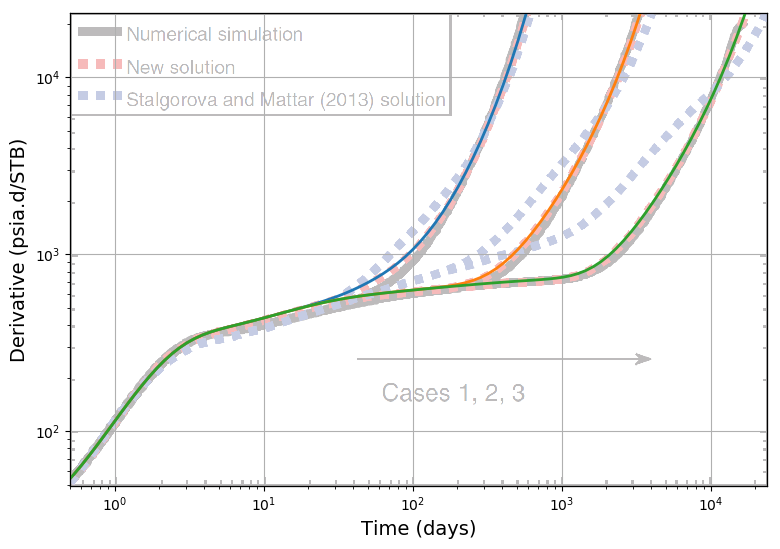

In [45]:
plotresult('', x=t_SM[:, 0:3], y=abs(dpnorm_SM[:, 0:3]),
           xlim=(5e-1, 2.4e4), ylim=(4.9e1, 2.3e4),
           xlabel='Time (days)', ylabel='Derivative (psia.d/STB)',
           label=['Case 1', 'Case 2', 'Case 3'], alpha=0.3,
           figsize=(9, 6.26), background='SM1.png', grid='major')

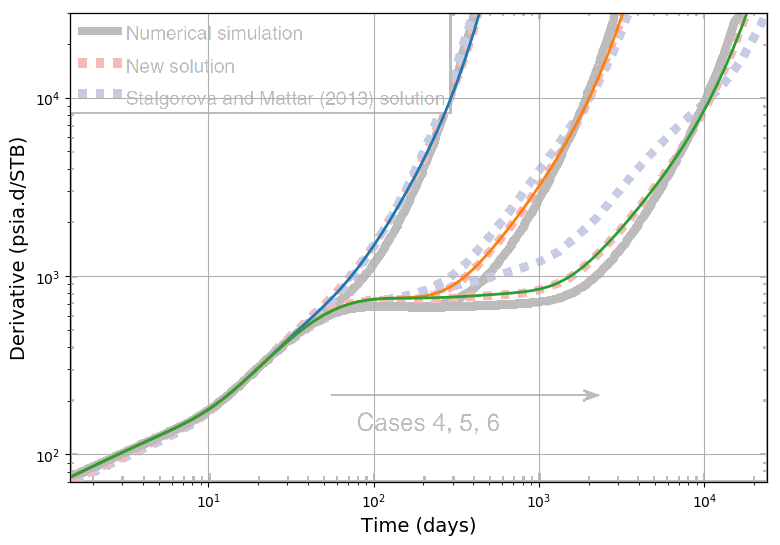

In [46]:
plotresult('', x=t_SM[:, 3:6], y=abs(dpnorm_SM[:, 3:6]),
           xlim=(1.45e0, 2.4e4), ylim=(7e1, 3e4),
           xlabel='Time (days)', ylabel='Derivative (psia.d/STB)',
           label=['Case 4', 'Case 5', 'Case 6'], alpha=0.3,
           figsize=(9, 6.22), background='SM2.png', grid='major')

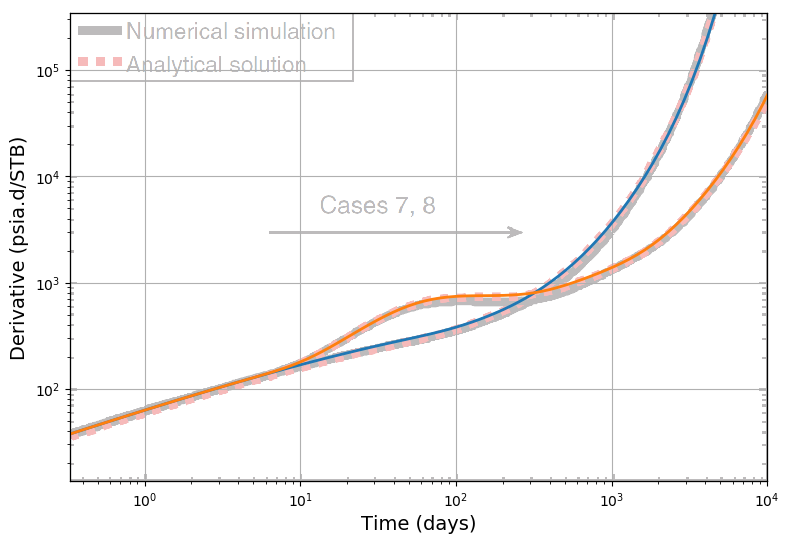

In [47]:
plotresult('', x=t_SM[:, 6:8], y=abs(dpnorm_SM[:, 6:8]),
           xlim=(3.3e-1, 1e4), ylim=(1.35e1, 3.45e5),
           xlabel='Time (days)', ylabel='Derivative (psia.d/STB)',
           label=['Case 7', 'Case 8'], alpha=0.3,
           figsize=(9, 6.2), background='SM3.png', grid='major')

### Comparing with 2<sup>nd</sup> BDF Local Solutions

#### Effect of y<sub>Ds</sub> on 2<sup>nd</sup> BDF Solution

In [48]:
# Base case parameters
xDe = 5
xD1 = 2.5
xD2 = 2.5

yDe = 0.3
yDs = 0.03
yD1 = yDe - yDs

Rk = 0.005
Rphi = 0.3
Reta = Rk/Rphi

In [49]:
# Case-specific parameters
xDe = 2
xD1 = 1
xD2 = 1
yDss = [0.005, 0.03, 0.09]

In [50]:
npoints = 100
tD_loc1 = np.zeros((npoints, len(yDss)))
qD_loc1 = np.zeros((npoints, len(yDss)))
qD_loc1b = np.zeros((npoints, len(yDss)))

for i in range(len(yDss)):
    yDs = yDss[i]
    yD1 = yDe - yDs
    tD_loc1[:, i], qD_loc1[:, i] = invertlaplace(qD_infinite_conductivity,
                                                 tDmin=1e-2, tDmax=3e-1)
    print(str(yDs)+' done.')

0.005 done.
0.03 done.
0.09 done.


In [51]:
tD_loc1b = tD_loc1[:, 0]
qD_loc1b = 1/(yDe/4*np.exp(np.pi**2*tD_loc1b/(4*yDe**2)))

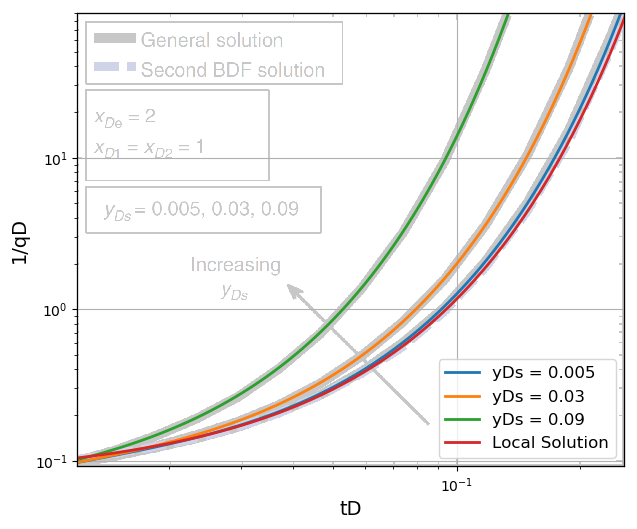

In [52]:
plotresult('', x=np.column_stack((tD_loc1, tD_loc1b)), y=np.column_stack((1/qD_loc1, 1/qD_loc1b)),
           xlim=(1.2e-2, 2.55e-1), ylim=(9.2e-2, 9e1),
           xlabel='tD', ylabel='1/qD',
           label=['yDs = '+str(yDs) for yDs in yDs]+['Local Solution'],
           figsize=(7.05, 6), background='loc1.png', legend='lower right', grid='major')

#### Effect of y<sub>De</sub> on 2<sup>nd</sup> BDF Solution

**General Solution with xDe = 5**

In [53]:
# Base case parameters
xDe = 5
xD1 = 2.5
xD2 = 2.5

yDe = 0.3
yDs = 0.03
yD1 = yDe - yDs

Rk = 0.005
Rphi = 0.3
Reta = Rk/Rphi

In [54]:
# Case-specific parameters
yDs = 0.0003 
yDes = [0.01, 0.05, 0.1, 0.5]

In [55]:
npoints = 100
tD_loc2 = np.zeros((npoints, len(yDes)))
qD_loc2 = np.zeros((npoints, len(yDes)))
qD_loc2b = np.zeros((npoints, len(yDes)))

for i in range(len(yDes)):
    yDe = yDes[i]
    yD1 = yDe - yDs
    tD_loc2[:, i], qD_loc2[:, i] = invertlaplace(qD_infinite_conductivity,
                                                 tDmin=1e-6, tDmax=1e1)
    print(str(yDe)+' done.')

0.01 done.
0.05 done.
0.1 done.
0.5 done.


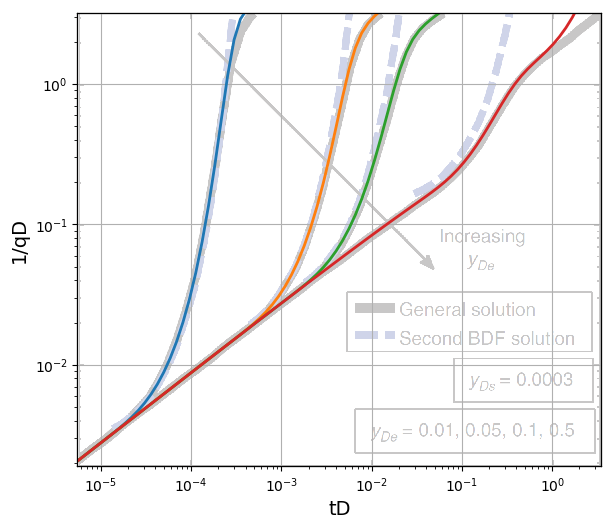

In [56]:
plotresult('', x=tD_loc2, y=1/qD_loc2,
           xlim=(5.5e-6, 3.5e0), ylim=(1.9e-3, 3.2e0),
           xlabel='tD', ylabel='1/qD',
           label=['yDe = '+str(yDe) for yDe in yDes],
           figsize=(6.76, 6), background='loc2.png', legend=None, grid='major')

**General Solution with xDe = 2**

In [57]:
# Base case parameters
xDe = 5
xD1 = 2.5
xD2 = 2.5

yDe = 0.3
yDs = 0.03
yD1 = yDe - yDs

Rk = 0.005
Rphi = 0.3
Reta = Rk/Rphi

In [58]:
# Case-specific parameters
xDe = 2
xD1 = 1
xD2 = 1
yDs = 0.0003 
yDes = [0.01, 0.05, 0.1, 0.5]

In [59]:
npoints = 100
tD_loc2 = np.zeros((npoints, len(yDes)))
qD_loc2 = np.zeros((npoints, len(yDes)))
qD_loc2b = np.zeros((npoints, len(yDes)))

for i in range(len(yDes)):
    yDe = yDes[i]
    yD1 = yDe - yDs
    tD_loc2[:, i], qD_loc2[:, i] = invertlaplace(qD_infinite_conductivity,
                                                 tDmin=1e-6, tDmax=1e1)
    print(str(yDe)+' done.')

0.01 done.
0.05 done.
0.1 done.
0.5 done.


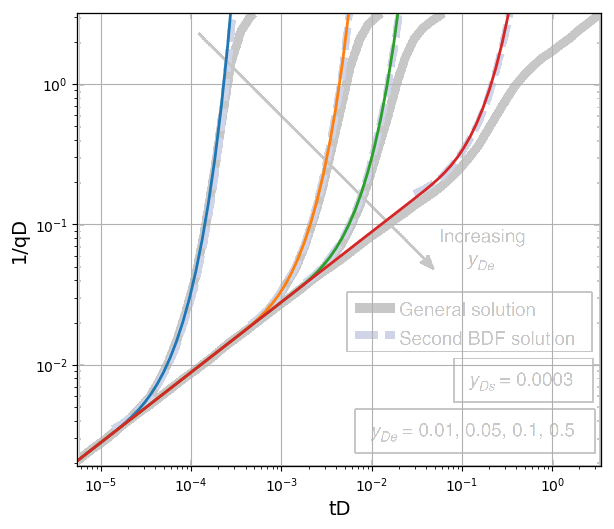

In [60]:
plotresult('', x=tD_loc2, y=abs(1/qD_loc2),
           xlim=(5.5e-6, 3.5e0), ylim=(1.9e-3, 3.2e0),
           xlabel='tD', ylabel='1/qD',
           label=['yDe = '+str(yDe) for yDe in yDes],
           figsize=(6.76, 6), background='loc2.png', legend=None, grid='major')

**Local Solution**

In [61]:
tD_loc2b = tD_loc2
qD_loc2b = 1/(np.array(yDes)/4*np.exp(np.pi**2*tD_loc2b/(4*np.array(yDes)**2)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6666: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


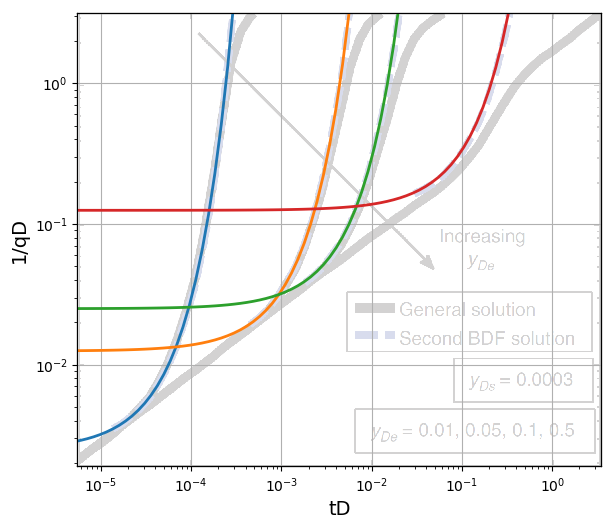

In [62]:
plotresult('', x=tD_loc2b, y=1/qD_loc2b,
           xlim=(5.5e-6, 3.5e0), ylim=(1.9e-3, 3.15e0),
           xlabel='tD', ylabel='1/qD',
           label=['Local Solution']*4,
           figsize=(6.76, 6), background='loc2.png', alpha=0.2, grid='major')

### Sensitivity Studies

#### Varying R<sub>k</sub> (and as a result, varying R<sub>$\eta$</sub>)

In [63]:
# Base case parameters
xDe = 5
xD1 = 2.5
xD2 = 2.5

yDe = 0.3
yDs = 0.03
yD1 = yDe - yDs

Rk = 0.005
Rphi = 0.3
Reta = Rk/Rphi

In [64]:
# Case-specific parameters
Rks = np.logspace(-4, -1, 4)

In [65]:
npoints = 100
tD_Rk = np.zeros((npoints, len(Rks)))
qD_Rk = np.zeros((npoints, len(Rks)))

for i in range(len(Rks)):
    Rk = Rks[i]
    Reta = Rk/Rphi

    tD_Rk[:, i], qD_Rk[:, i] = invertlaplace(qD_infinite_conductivity,
                                             tDmin=2e-8, tDmax=2e-1)
    print(str(Rk)+' done.')

0.0001 done.
0.001 done.
0.01 done.
0.1 done.


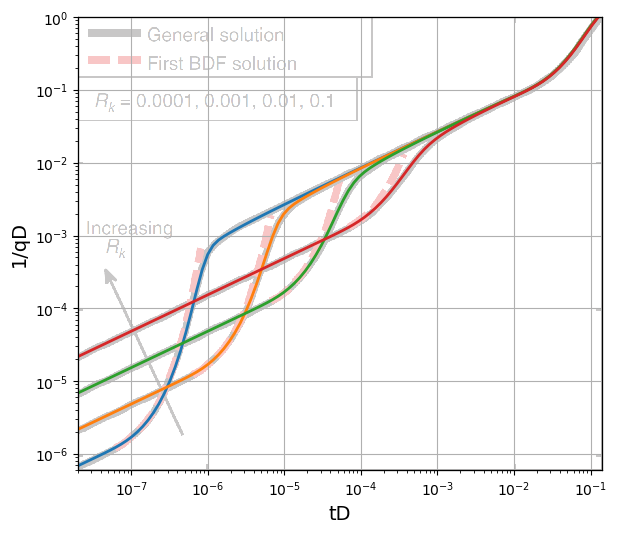

In [66]:
plotresult('', x=tD_Rk, y=1/qD_Rk,
           xlim=(2e-8, 1.4e-1), ylim=(6e-7, 1e0),
           xlabel='tD', ylabel='1/qD',
           label=['Rk = '+str(Rk) for Rk in Rks],
           figsize=(6.76, 6), background='sen1.png', grid='major')

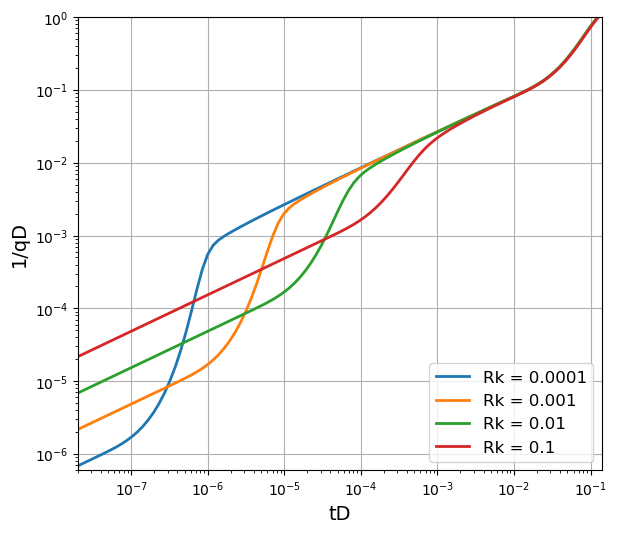

In [67]:
plotresult('', x=tD_Rk, y=1/qD_Rk,
           xlim=(2e-8, 1.4e-1), ylim=(6e-7, 1e0),
           xlabel='tD', ylabel='1/qD',
           label=['Rk = '+str(Rk) for Rk in Rks],
           figsize=(6.76, 6), background=None, grid='major', legend='lower right')

#### Varying y<sub>Ds</sub> (and thereofore, varying y<sub>D1</sub>)

In [68]:
# Base case parameters
xDe = 5
xD1 = 2.5
xD2 = 2.5

yDe = 0.3
yDs = 0.03
yD1 = yDe - yDs

Rk = 0.005
Rphi = 0.3
Reta = Rk/Rphi

In [69]:
# Case-specific parameters
yDss = [0.01, 0.03, 0.09]

In [70]:
npoints = 100
tD_yDs = np.zeros((npoints, len(yDss)))
qD_yDs = np.zeros((npoints, len(yDss)))

for i in range(len(yDss)):
    yDs = yDss[i]
    yD1 = yDe - yDs
    tD_yDs[:, i], qD_yDs[:, i] = invertlaplace(qD_infinite_conductivity,
                                               tDmin=1e-8, tDmax=1e1)
    print(str(yDs)+' done.')

0.01 done.
0.03 done.
0.09 done.


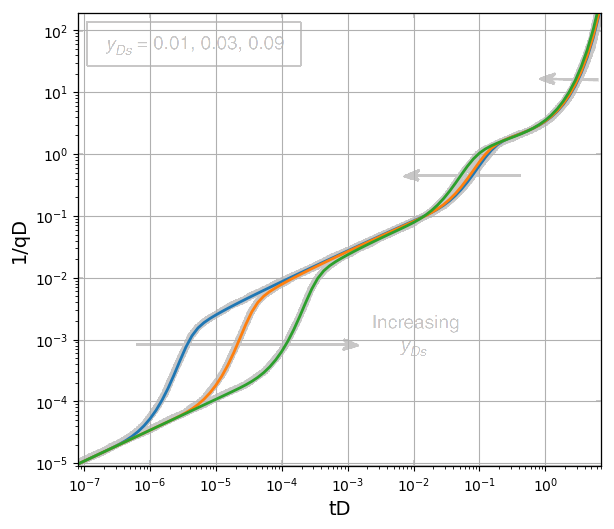

In [71]:
plotresult('', x=tD_yDs, y=1/qD_yDs,
           xlim=(8e-8, 7e0), ylim=(0.9e-5, 1.9e2),
           xlabel='tD', ylabel='1/qD',
           label=['yDs = '+str(yDs) for yDs in yDss],
           figsize=(6.75, 6), background='sen2.png', grid='major')

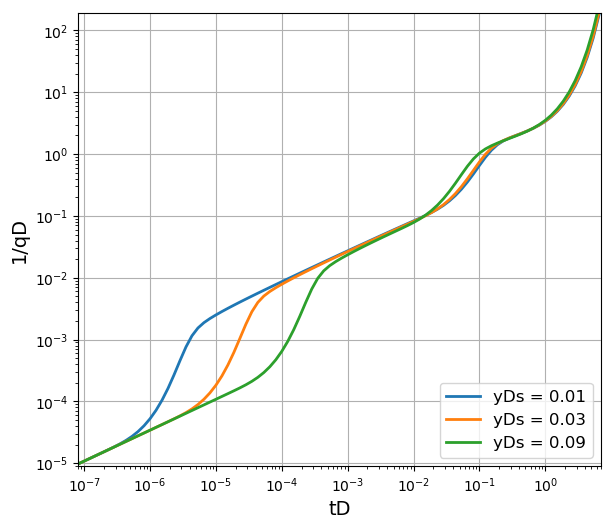

In [72]:
plotresult('', x=tD_yDs, y=1/qD_yDs,
           xlim=(8e-8, 7e0), ylim=(0.9e-5, 1.9e2),
           xlabel='tD', ylabel='1/qD',
           label=['yDs = '+str(yDs) for yDs in yDss],
           figsize=(6.75, 6), background=None, grid='major', legend='lower right')

#### Varying y<sub>De</sub> (and thereofore, varying y<sub>D1</sub>)

In [73]:
# Base case parameters
xDe = 5
xD1 = 2.5
xD2 = 2.5

yDe = 0.3
yDs = 0.03
yD1 = yDe - yDs

Rk = 0.005
Rphi = 0.3
Reta = Rk/Rphi

In [74]:
# Case-specific parameters
yDes = [0.1, 3]

In [75]:
npoints = 100
tD_yDe = np.zeros((npoints, len(yDes)))
qD_yDe = np.zeros((npoints, len(yDes)))

for i in range(len(yDes)):
    yDe = yDes[i]
    yD1 = yDe - yDs
    tD_yDe[:, i], qD_yDe[:, i] = invertlaplace(qD_infinite_conductivity,
                                               tDmin=1e-7, tDmax=1e2)
    print(str(yDe)+' done.')

0.1 done.
3 done.


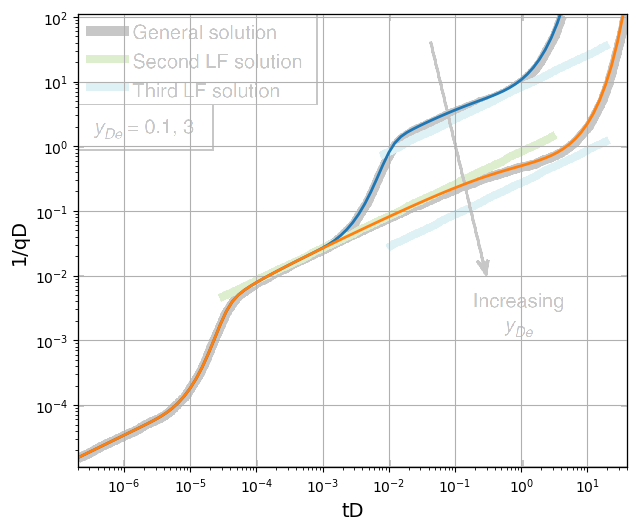

In [76]:
plotresult('', x=tD_yDe, y=1/abs(qD_yDe),
           xlim=(2e-7, 4e1), ylim=(1.1e-5, 1.1e2),
           xlabel='tD', ylabel='1/qD',
           label=['yDe = '+str(yDe) for yDe in yDes],
           figsize=(7.09, 6), background='sen3.png', grid='major')

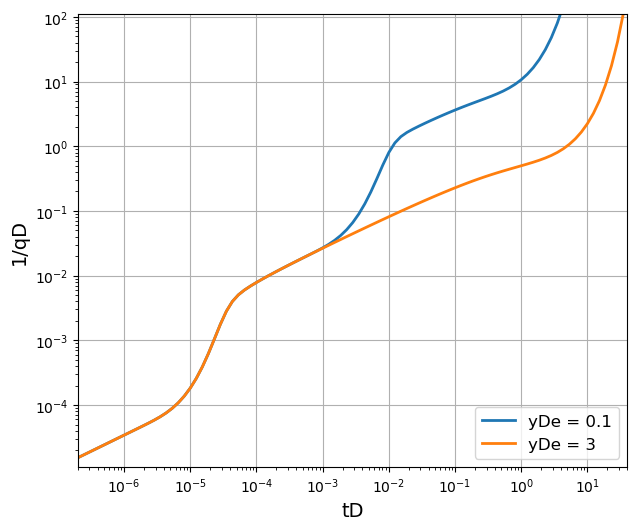

In [77]:
plotresult('', x=tD_yDe, y=1/abs(qD_yDe),
           xlim=(2e-7, 4e1), ylim=(1.1e-5, 1.1e2),
           xlabel='tD', ylabel='1/qD',
           label=['yDe = '+str(yDe) for yDe in yDes],
           figsize=(7.09, 6), background=None, grid='major', legend='lower right')

#### Varying x<sub>De</sub> (and thereofore, varying x<sub>D1</sub> and x<sub>D2</sub>)

In [78]:
# Base case parameters
xDe = 5
xD1 = 2.5
xD2 = 2.5

yDe = 0.3
yDs = 0.03
yD1 = yDe - yDs

Rk = 0.005
Rphi = 0.3
Reta = Rk/Rphi

In [79]:
# Case-specific parameters
xDes = [2, 5, 10]

In [80]:
npoints = 100
tD_xDe = np.zeros((npoints, len(xDes)))
qD_xDe = np.zeros((npoints, len(xDes)))

for i in range(len(xDes)):
    xDe = xDes[i]
    xD1 = xDe/2
    xD2 = xDe/2
    tD_xDe[:, i], qD_xDe[:, i] = invertlaplace(qD_infinite_conductivity,
                                               tDmin=1e-7, tDmax=1e2)
    print(str(xDe)+' done.')

2 done.
5 done.
10 done.


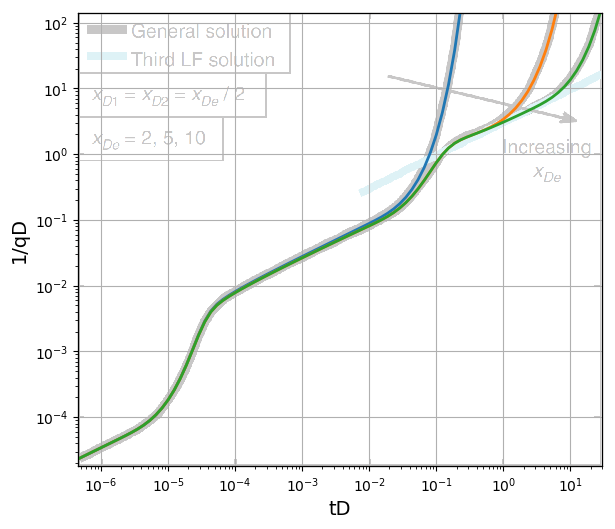

In [81]:
plotresult('', x=tD_xDe, y=1/abs(qD_xDe),
           xlim=(4.5e-7, 3e1), ylim=(1.8e-5, 1.4e2),
           xlabel='tD', ylabel='1/qD',
           label=['xDe = '+str(xDe) for xDe in xDes],
           figsize=(6.77, 6), background='sen4.png', grid='major')

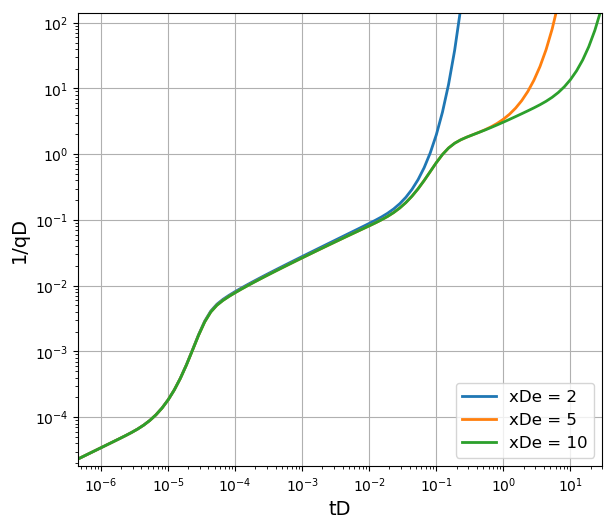

In [82]:
plotresult('', x=tD_xDe, y=1/abs(qD_xDe),
           xlim=(4.5e-7, 3e1), ylim=(1.8e-5, 1.4e2),
           xlabel='tD', ylabel='1/qD',
           label=['xDe = '+str(xDe) for xDe in xDes],
           figsize=(6.77, 6), background=None, grid='major', legend='lower right')